# James-webb-space-telescope-image-analysis

Click on "Run" button to execute the code

Download data using the opendatasets module or download it directly from kaggle into the folder containing .ipynb file

Download the required modules and if there is an error while downloading opencv try:- pip install opencv-python

Change path if the images are in a different folder

Can also provide "path" by using glob module and a for loop

In [2]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

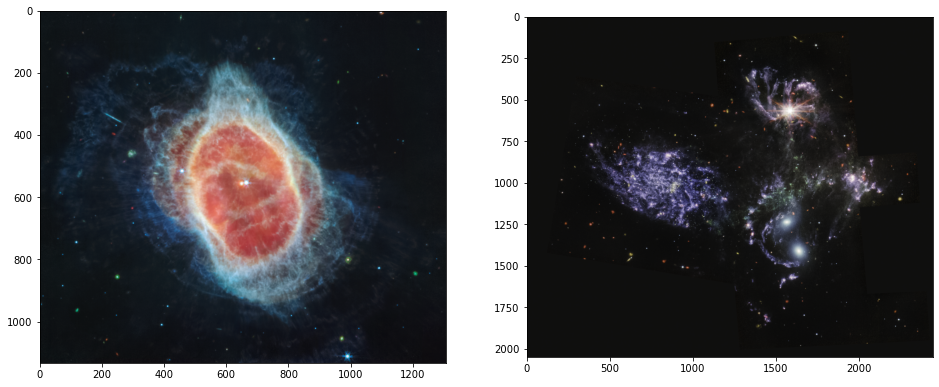

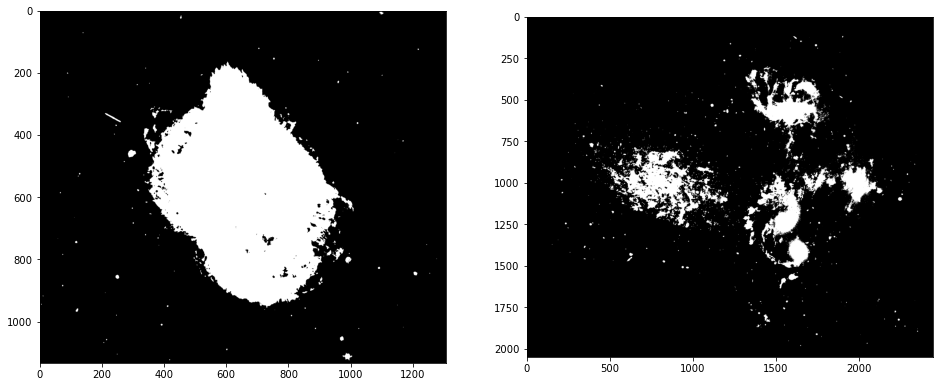

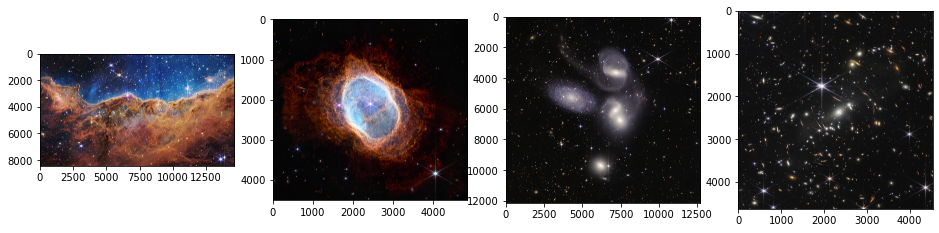

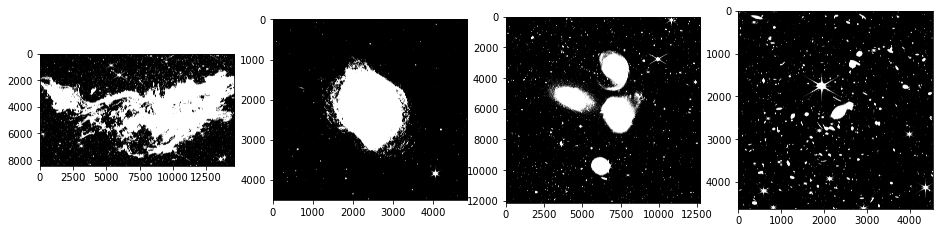

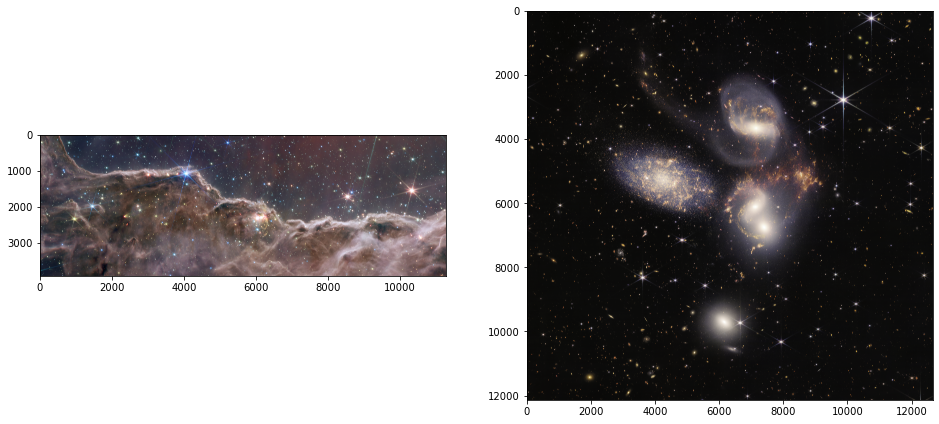

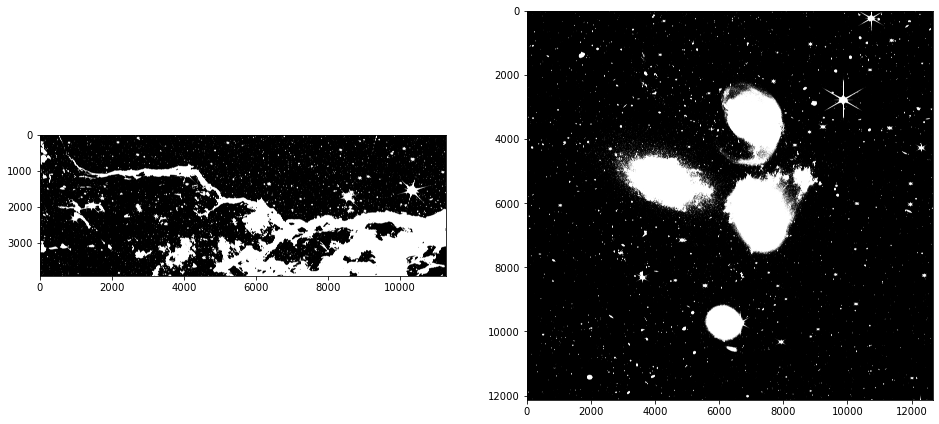

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.morphology import area_closing, area_opening
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

#Displaying Images normally
def show_image(image_data):
    fig, axs = plt.subplots(1,len(image_data),figsize=(16,8))
    for x, axes in zip(image_data, axs):
        axes.imshow(imread(x))
    
    #Displaying Binarized images
    figure, axiss = plt.subplots(1,len(image_data),figsize=(16,8))
    for i in range(len(image_data)):
        images=imread(image_data[i])
        grey_images=rgb2gray(images)
        thresh=threshold_otsu(grey_images)
        binary=grey_images>thresh
        axiss[i].imshow(binary,cmap="gray")

#Paths are hard coded for better understanding
#Change paths here if the images are in a different folder
MIRI=["..\\James Webb Space Telescope Image Analysis\\Images\\MIRI\\Southern Ring Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\MIRI\\Stephan Quintet.tif"]
MIRI_IMAGES=show_image(MIRI)
NIRCam=["..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Cosmic Cliffs in the Carina Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Southern Ring Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Stephan Quintet.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Webb First Deep Field.tif"]
NIRCam_IMAGES=show_image(NIRCam)
COMPOSITE=["..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam and MIRI Composite\\Cosmic Cliffs in the Carina Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam and MIRI Composite\\Stephan Quintet.tif"]
COMPOSITE_IMAGES=show_image(COMPOSITE)

Histogram Plot of pixel data of images

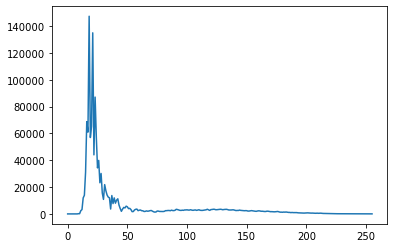

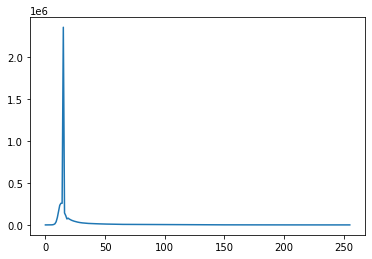

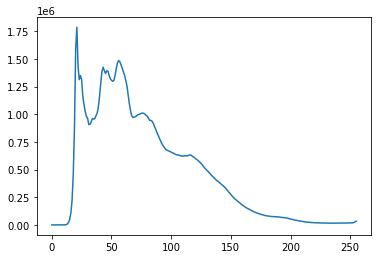

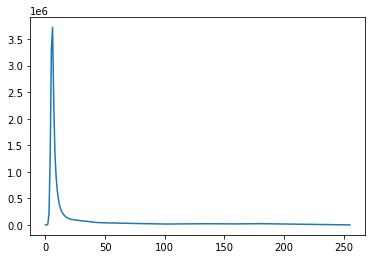

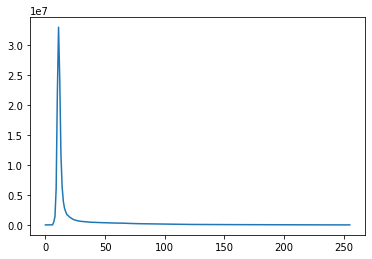

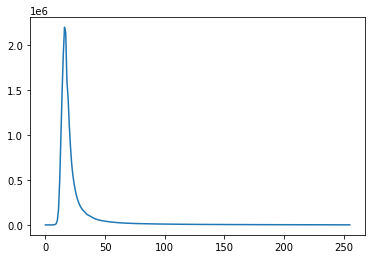

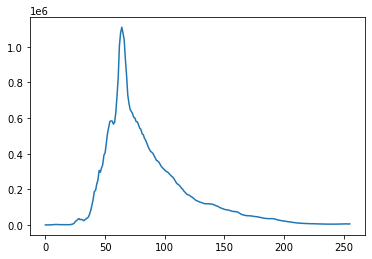

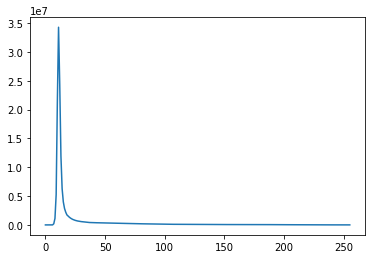

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)


def hist_plot(image_data):
    for i in range(len(image_data)):
        image=imread(image_data[i])
        grey_images=rgb2gray(image)
        histogram, bin_edges = np.histogram(grey_images.ravel(),256,range=(0,1))
        plt.plot(histogram) 
        plt.show()
        
#Paths are hard coded for better understanding
#Change paths here if the images are in a different folder
MIRI=["..\\James Webb Space Telescope Image Analysis\\Images\\MIRI\\Southern Ring Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\MIRI\\Stephan Quintet.tif"]
hist_plot(MIRI)
NIRCam=["..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Cosmic Cliffs in the Carina Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Southern Ring Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Stephan Quintet.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Webb First Deep Field.tif"]
hist_plot(NIRCam)
COMPOSITE=["..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam and MIRI Composite\\Cosmic Cliffs in the Carina Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam and MIRI Composite\\Stephan Quintet.tif"]
hist_plot(COMPOSITE)

Converting the images region-wise for easier data extraction

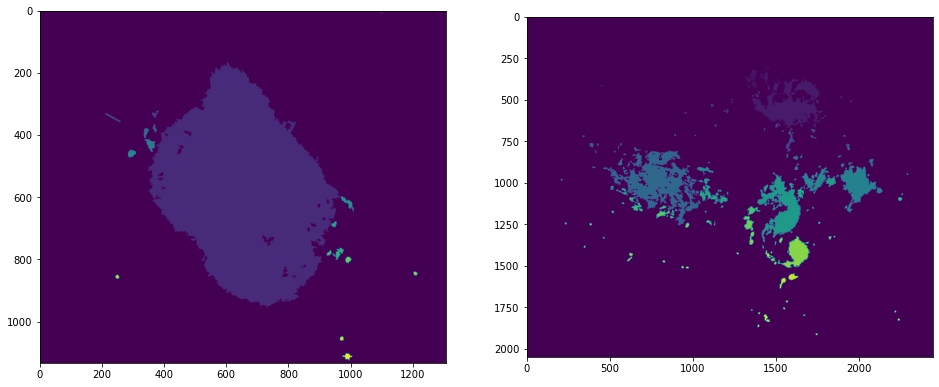

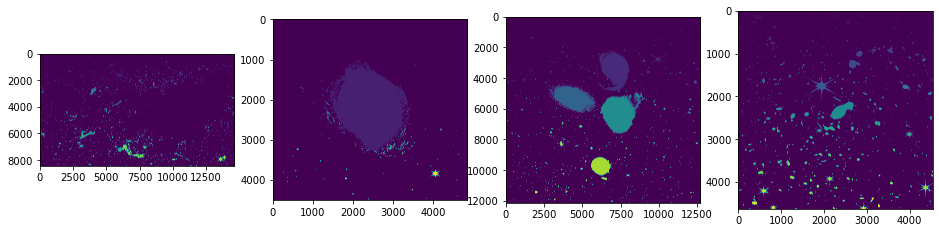

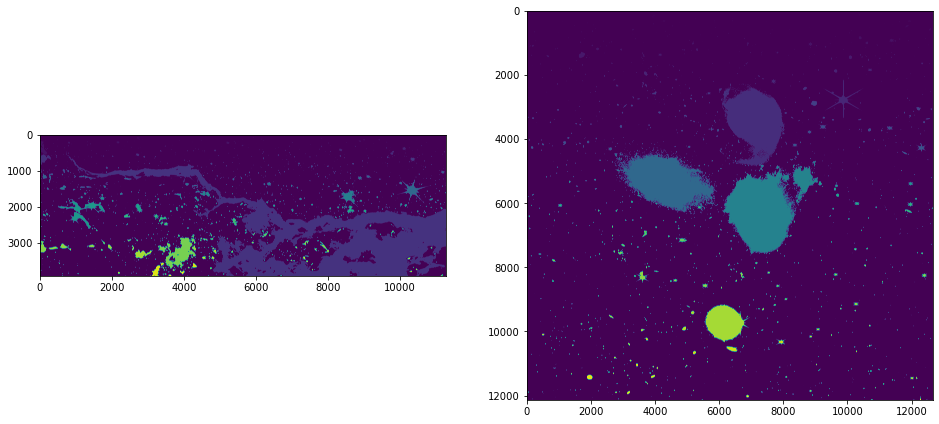

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu
from skimage.morphology import area_closing, area_opening
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

    
def new_images(image_data):
    figure, axiss = plt.subplots(1,len(image_data),figsize=(16,8))
    for i in range(len(image_data)):
        images=imread(image_data[i])
        grey_images=rgb2gray(images)
        thresh=threshold_otsu(grey_images)
        binary=grey_images>thresh
        closed_image=area_closing(binary)
        open_image=area_opening(closed_image)
        label_image=label(open_image)
        regions=regionprops(label_image)
        axiss[i].imshow(label_image)
        
#Paths are hard coded for better understanding
#Change paths here if the images are in a different folder
MIRI=["..\\James Webb Space Telescope Image Analysis\\Images\\MIRI\\Southern Ring Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\MIRI\\Stephan Quintet.tif"]
MIRI_IMAGES=new_images(MIRI)
NIRCam=["..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Cosmic Cliffs in the Carina Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Southern Ring Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Stephan Quintet.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Webb First Deep Field.tif"]
NIRCam_IMAGES=new_images(NIRCam)
COMPOSITE=["..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam and MIRI Composite\\Cosmic Cliffs in the Carina Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam and MIRI Composite\\Stephan Quintet.tif"]
COMPOSITE_IMAGES=new_images(COMPOSITE)

Data is extracted from the images using skimage and its properties. This data is stored into a CSV file which can then be used for image classification and  to train ML models to predict area,properties,location of neighbouring galaxies,stars etc.. 

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
from skimage.io import imread, imshow
from skimage.color import rgb2gray  
from skimage.measure import label, regionprops,regionprops_table
from skimage.filters import threshold_otsu
from skimage.morphology import area_closing, area_opening




def data_image(image_data):
    values=['area','convex_area','bbox_area','major_axis_length','minor_axis_length','perimeter','equivalent_diameter','mean_intensity','solidity','eccentricity']
    dataframe=pd.DataFrame(columns=values)
    for i in range(len(image_data)):
        images=imread(image_data[i])
        grey_images=rgb2gray(images)
        thresh=threshold_otsu(grey_images)
        binary=grey_images>thresh
        closed=area_closing(binary)
        opened=area_opening(closed) 
        label_image=label(opened)
        region=regionprops(label_image)
        DF1=pd.DataFrame(regionprops_table(label_image,grey_images,properties=values))
        DF1=DF1[(DF1.index!=0) & (DF1.area>100)]
        dataframe=pd.concat([dataframe,DF1])
    return dataframe

#Paths are hard coded for better understanding
#Change paths here if the images are in a different folder
MIRI=["..\\James Webb Space Telescope Image Analysis\\Images\\MIRI\\Southern Ring Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\MIRI\\Stephan Quintet.tif"]
MIRI_data=data_image(MIRI)
MIRI_data["type"]="MIRI"
NIRCam=["..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Cosmic Cliffs in the Carina Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Southern Ring Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Stephan Quintet.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Webb First Deep Field.tif"]
NIRCam_data=data_image(NIRCam)
NIRCam_data["type"]="NIRCam"
COMPOSITE=["..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam and MIRI Composite\\Cosmic Cliffs in the Carina Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam and MIRI Composite\\Stephan Quintet.tif"]
COMPOSITE_data=data_image(COMPOSITE)
COMPOSITE_data["type"]="COMPOSITE"
Data_all=pd.concat([MIRI_data,NIRCam_data,COMPOSITE_data])
#Data_all.to_csv('..\\James Webb Space Telescope Image Analysis\\Dataset\\Data.csv')- Data has already been updated to the csv file from previous execution of code. To make a new csv file uncomment this and change the file name
print(Data_all)

        area convex_area bbox_area major_axis_length minor_axis_length  \
1     285997      316771    489010        736.114318         511.89948   
2        236         329       550         26.523604         16.189085   
3        266         317      1479         63.206994          5.465571   
4        172         233       351         25.542634          10.14716   
5        301         354       561         33.050618         12.926506   
...      ...         ...       ...               ...               ...   
3329     217         303      2142         76.820047          4.063642   
3330     136         144       176         16.447399         10.697897   
3331     129         196      1537         67.362072          2.812946   
3332     723         953      1050           47.8644         22.075213   
3333     407         633       880         54.268876         12.484146   

        perimeter equivalent_diameter mean_intensity  solidity eccentricity  \
1     4963.413885          603.4

# Analysis using opencv,cv2 and Matplotlib

Sobel is used for edge detection.x_sobel and y_sobel respond maximally to edges running vertically and horizontally relative to the pixel grid. Laplacian or 2nd derivative of the image helps in measuring the rate at which first derivative changes Canny edge detector uses a multi stage edge detection algorithm which can help in identification of wide range of edges. It can be used in recognition of edges of differing characteristics.

For faster image analysis scale the image down using resize() method.
cv2.resize(image name,dimensions)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


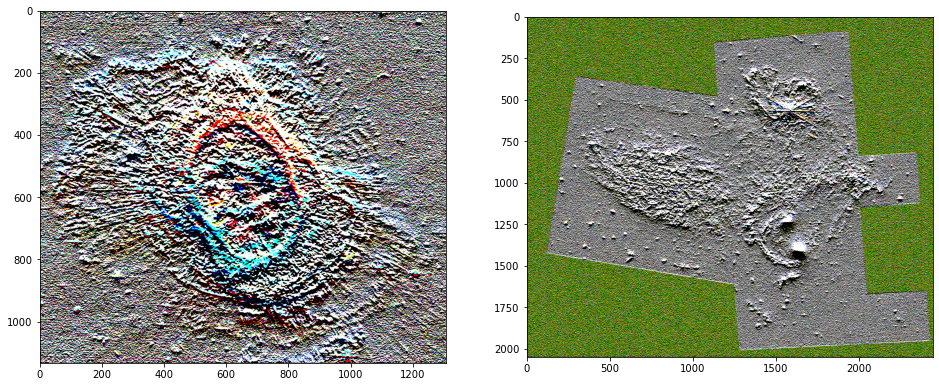

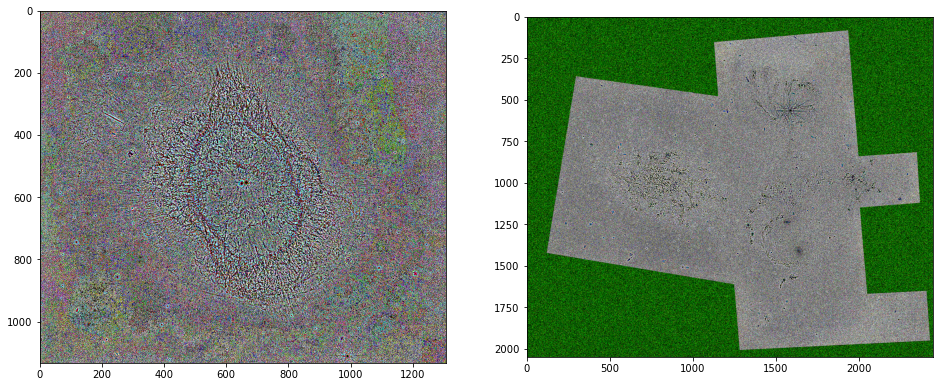

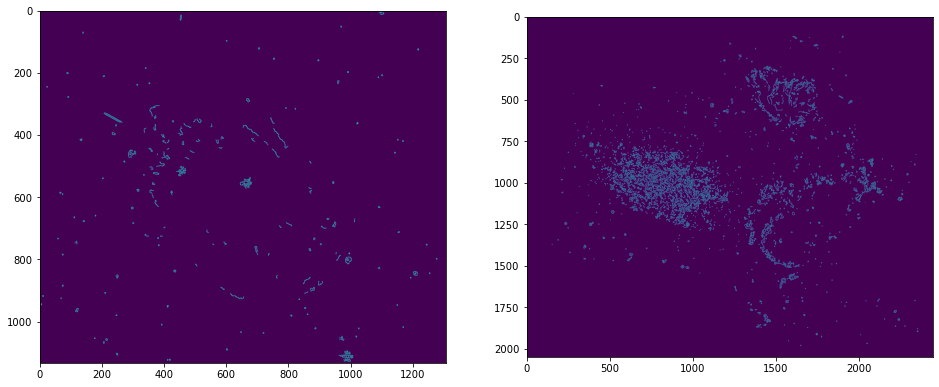

In [1]:
#For vertical edge detection :- y_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
import cv2
import matplotlib.pyplot as plt

def show_image_method2_x(image_data):
    fig, axs = plt.subplots(1,len(image_data),figsize=(16,8))
    for i in range(len(image_data)):
        image=cv2.imread(image_data[i])
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        x_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
        axs[i].imshow(x_sobel)
        
def laplacian_image(image_data):
    fig, axs = plt.subplots(1,len(image_data),figsize=(16,8))
    for i in range(len(image_data)):
        image=cv2.imread(image_data[i])
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        laplacian = cv2.Laplacian(image, cv2.CV_64F)
        axs[i].imshow(laplacian)

def edges_image(image_data):
    fig, axs = plt.subplots(1,len(image_data),figsize=(16,8))
    for i in range(len(image_data)):
        image=cv2.imread(image_data[i])
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        edges=cv2.Canny(image,100,200)
        axs[i].imshow(edges)
MIRI=["..\\James Webb Space Telescope Image Analysis\\Images\\MIRI\\Southern Ring Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\MIRI\\Stephan Quintet.tif"]
show_image_method2_x(MIRI)
laplacian_image(MIRI)
edges_image(MIRI)

In [ ]:
#For vertical edge detection :- y_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
import cv2
import matplotlib.pyplot as plt

def show_image_method2_x(image_data):
    fig, axs = plt.subplots(1,len(image_data),figsize=(16,8))
    for i in range(len(image_data)):
        image=cv2.imread(image_data[i])
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        x_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
        axs[i].imshow(x_sobel)
        

def edges_image(image_data):
    fig, axs = plt.subplots(1,len(image_data),figsize=(16,8))
    for i in range(len(image_data)):
        image=cv2.imread(image_data[i])
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        edges=cv2.Canny(image,100,200)
        axs[i].imshow(edges)
        
def laplacian_image(image_data):
    fig, axs = plt.subplots(1,len(image_data),figsize=(16,8))
    for i in range(len(image_data)):
        image=cv2.imread(image_data[i])
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        laplacian = cv2.Laplacian(image, cv2.CV_64F)
        axs[i].imshow(laplacian)
    
def edges_image(image_data):
    fig, axs = plt.subplots(1,len(image_data),figsize=(16,8))
    for i in range(len(image_data)):
        image=cv2.imread(image_data[i])
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        edges=cv2.Canny(image,100,200)
        axs[i].imshow(edges)
        
NIRCam=["..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Cosmic Cliffs in the Carina Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Southern Ring Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Stephan Quintet.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam\\Webb First Deep Field.tif"]
show_image_method2_x(NIRCam)
laplacian_image(NIRCam)
edges_image(NIRCam)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


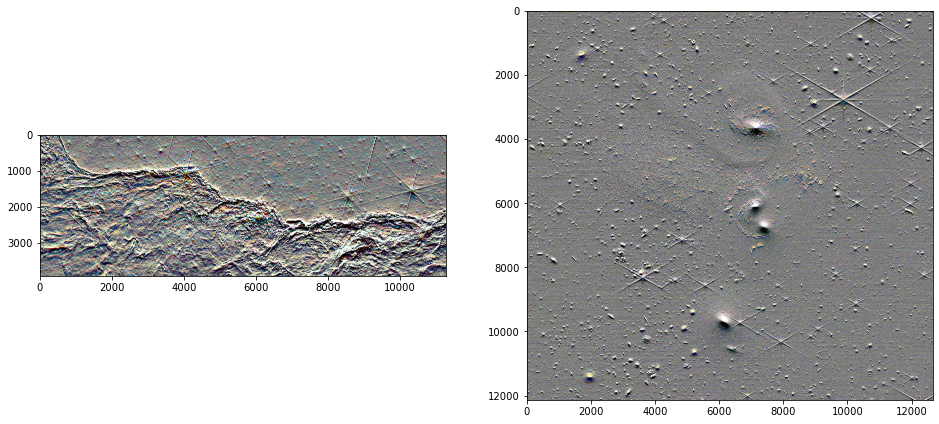

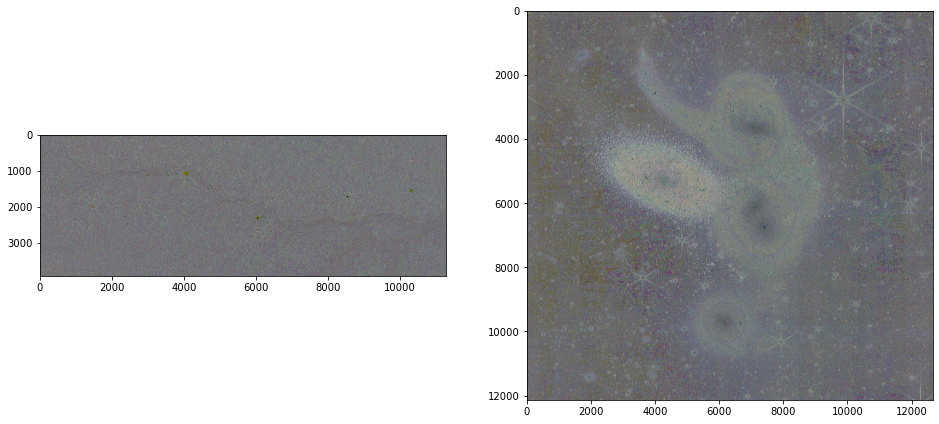

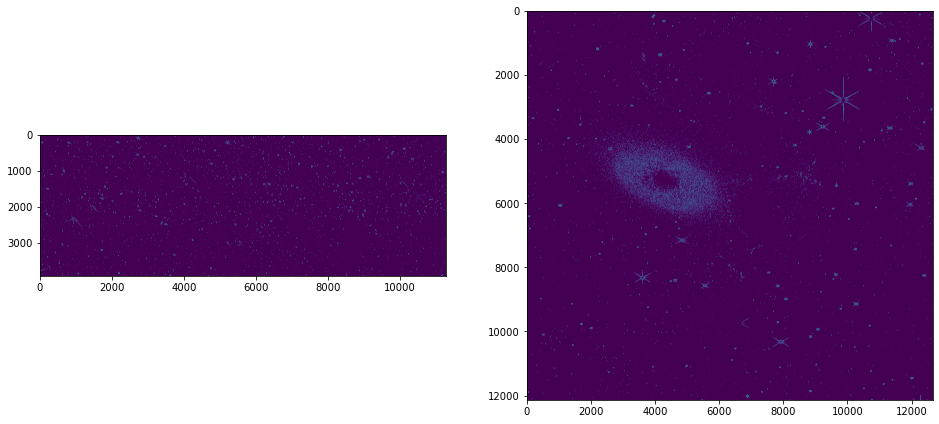

In [1]:
#For vertical edge detection :- y_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
import cv2
import matplotlib.pyplot as plt

def show_image_method2_x(image_data):
    fig, axs = plt.subplots(1,len(image_data),figsize=(16,8))
    for i in range(len(image_data)):
        image=cv2.imread(image_data[i])
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        x_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
        axs[i].imshow(x_sobel)
        
def laplacian_image(image_data):
    fig, axs = plt.subplots(1,len(image_data),figsize=(16,8))
    for i in range(len(image_data)):
        image=cv2.imread(image_data[i])
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        laplacian = cv2.Laplacian(image, cv2.CV_64F)
        axs[i].imshow(laplacian)

def edges_image(image_data):
    fig, axs = plt.subplots(1,len(image_data),figsize=(16,8))
    for i in range(len(image_data)):
        image=cv2.imread(image_data[i])
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        edges=cv2.Canny(image,100,200)
        axs[i].imshow(edges)
COMPOSITE=["..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam and MIRI Composite\\Cosmic Cliffs in the Carina Nebula.tif","..\\James Webb Space Telescope Image Analysis\\Images\\NIRCam and MIRI Composite\\Stephan Quintet.tif"]
show_image_method2_x(COMPOSITE)
laplacian_image(COMPOSITE)
edges_image(COMPOSITE)

# Analysis

The dataset's photos are all first transformed to greyscale versions.
This approach makes it simpler and requires less computing with the use of greyscale images. When colour photos are used for image analysis, extraneous information will be included therefore increasing the amount of training data necessary to attain acceptable accuracy and performance. So they are transformed into greyscale images.

Then, greyscale images are transformed into binary images using thresholding. We employ thresholding in the James Webb space telescope image analysis to separate items from a backdrop.
Because we can distinguish between the many light sources, such as galaxies, stars, etc., and the dark background of space, this method in particular is highly helpful. Once we have the binary image, we can visually identify the different light sources in the dataset.
Astronomers can use this as a preliminary observation technique.
Combining area opening and area closing allows components with an area less than lambda to be eliminated, advancing image analysis.

The label method is then used to act as a container for the images and regionprops method is used to extract the properties 
of the image. With this method we can get data ['area','convex_area','bbox_area','major_axis_length','minor_axis_length','perimeter','equivalent_diameter','mean_intensity,'solidity','eccentricity'] for all the images.This is the data that can be used for image classification and regression techniques. All the data obtained from MIRI images, NIRCam images and Composite(both NIRCam and MIRI) is then stored into a single
dataframe. The data from this dataframe can then be used for image classification for the new images obtained or we can use some AI and deep learning models to predict the images of nearby stars,galaxies.. etc. All the data is stored in the data.csv file of the dataset folder.

Laplacian provides an image's second derivative, which quantifies how quickly the first derivative is changing. This establishes whether a change in the values of adjacent pixels results from a continuous progression or an edge.
In relation to the pixel grid, X sobel and Y sobel react most strongly to edges that run vertically and horizontally , Ksize is limited to 1, 3, 5, or 7. Greater k will result in fewer fake corners but more real ones will be missed. Conversely, smaller k will result in many more corners, many more of which will be false.

With visual analysis we can see the edges of the James Webb Space telescope images. We can use the data obtained to perform and implement various ML models.